In [1]:
"We start by viewing the data for each graph."

'We start by viewing the data for each graph.'

is symmetric: True


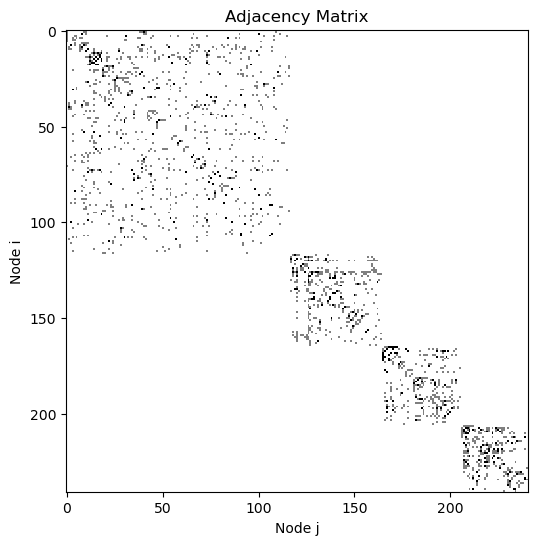

In [2]:
import numpy as np

from scipy.sparse import coo_matrix, csgraph
from scipy.sparse.linalg import eigsh
from numpy.linalg import eig
import matplotlib.pyplot  as plt;

def dat_to_adj(filename):
    # --- Load CSV edge list ---
    E = np.loadtxt(filename, delimiter=",")
    
    # Extract columns
    col1 = E[:, 0].astype(int)
    col2 = E[:, 1].astype(int)
    
    # Find maximum node id
    max_ids = int(max(col1.max(), col2.max()))
    
    # --- Build sparse adjacency matrix ---
    As = coo_matrix((np.ones(len(col1)), (col1 - 1, col2 - 1)),  # if ids start at 1
                    shape=(max_ids, max_ids))
    return As



As = dat_to_adj("example1.dat")
print("is symmetric:", (As - As.T).nnz == 0)
A = As.toarray()
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray_r", interpolation="nearest")
plt.title("Adjacency Matrix")
plt.xlabel("Node j")
plt.ylabel("Node i")
plt.show()

In [3]:
"We can clearly see 4 well defined clusters."

'We can clearly see 4 well defined clusters.'

In [4]:
"Now, lets look at the second dataset - example2.dat, which is synthetic"

'Now, lets look at the second dataset - example2.dat, which is synthetic'

is symmetric: True


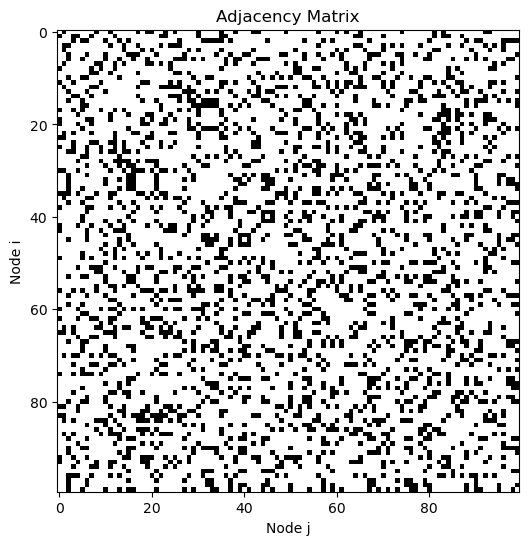

In [5]:
As = dat_to_adj("example2.dat")
print("is symmetric:", (As - As.T).nnz == 0)
A = As.toarray()
plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray_r", interpolation="nearest")
plt.title("Adjacency Matrix")
plt.xlabel("Node j")
plt.ylabel("Node i")
plt.show()

In [6]:
"I don't see the clusters here, but that doesn't mean they don't exist."

"I don't see the clusters here, but that doesn't mean they don't exist."

EigenVals are: [-3.67896815e-15  3.90653700e+00  1.41590494e+01  1.46360224e+01
  1.50264321e+01  1.55531958e+01  1.59299797e+01  1.60572316e+01
  1.65516543e+01  1.68647478e+01]


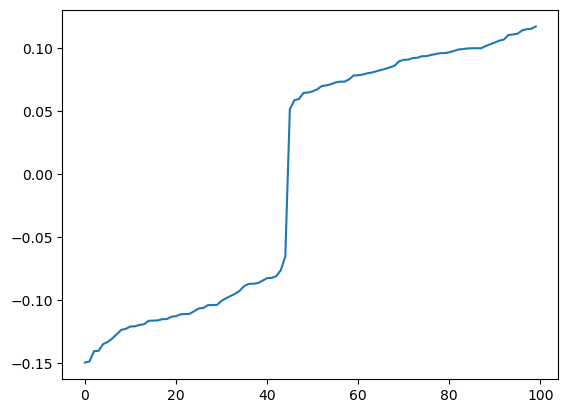

In [7]:
L = csgraph.laplacian(As, normed=False) # normed=True matches the document, normed=False matches the class
vals, vecs = eigsh(L, 10, which='SM')
print(f"EigenVals are: {vals}")
feidler = vecs[:, 1]
order = np.argsort(feidler)
plt.plot(feidler[order])
plt.show()

In [8]:
"Example2.dat has a very nice feidler vector, now we will view the feidler for example 1."

'Example2.dat has a very nice feidler vector, now we will view the feidler for example 1.'

EigenVals are: [-6.18961924e-15 -5.77090460e-15 -4.21112939e-15 -3.54674000e-15
  5.32447257e-01  8.11840167e-01  1.16986861e+00  1.43321031e+00
  1.48736487e+00  1.56710552e+00]


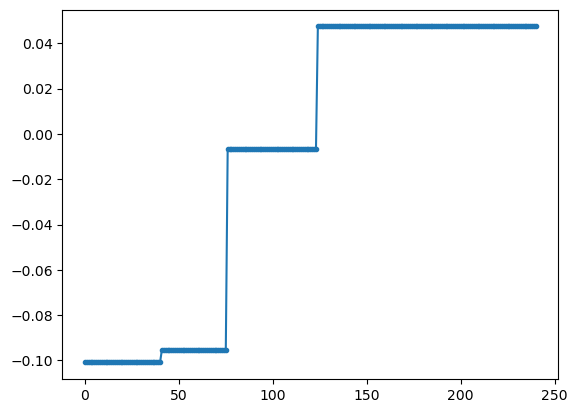

In [9]:
As = dat_to_adj("example1.dat")
L = csgraph.laplacian(As, normed=False)
vals, vecs = eigsh(L, 10, which='SM')
print(f"EigenVals are: {vals}")
feidler = vecs[:, 3]
order = np.argsort(feidler)
plt.plot(feidler[order], marker=".")
plt.show()

In [10]:
"A bit wacky, how are the eigen values?"
print(f"Eigenvalues are: {vals}")

Eigenvalues are: [-6.18961924e-15 -5.77090460e-15 -4.21112939e-15 -3.54674000e-15
  5.32447257e-01  8.11840167e-01  1.16986861e+00  1.43321031e+00
  1.48736487e+00  1.56710552e+00]


In [11]:
print(vals[4])
"This is the first real non zero eigen value, which indicates that we do have more than 2 clusters - 4 infact"

0.5324472574694471


'This is the first real non zero eigen value, which indicates that we do have more than 2 clusters - 4 infact'